<a href="https://colab.research.google.com/github/richikothari07/cv-session/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Edge Detection using Difference of Gaussians

In [ ]:
import cv2
from matplotlib import pyplot as plt

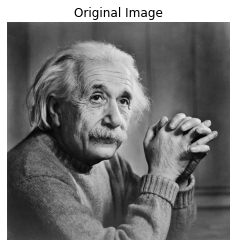

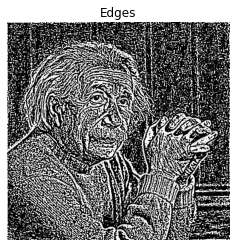

In [ ]:
#Reading the image
img = cv2.imread('/content/drive/MyDrive/einstein.jpg')
blur_gaus1 = cv2.GaussianBlur(img,(5,5),0)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),2)
edges = blur_gaus2 - blur_gaus1

#Plotting the images
plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img)
plt.figure(),plt.axis("off"),plt.title("Edges"),plt.imshow(edges)
plt.show()

Task 2: Template Matching using Histograms

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/IGVC 2015 UNSW Advanced Course GoPro - Speed Record_720P HD.mp4')
 
while(True):
   ret, frame = cap.read()
   hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
   cv2_imshow(hsv)
   if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

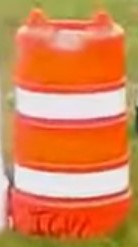

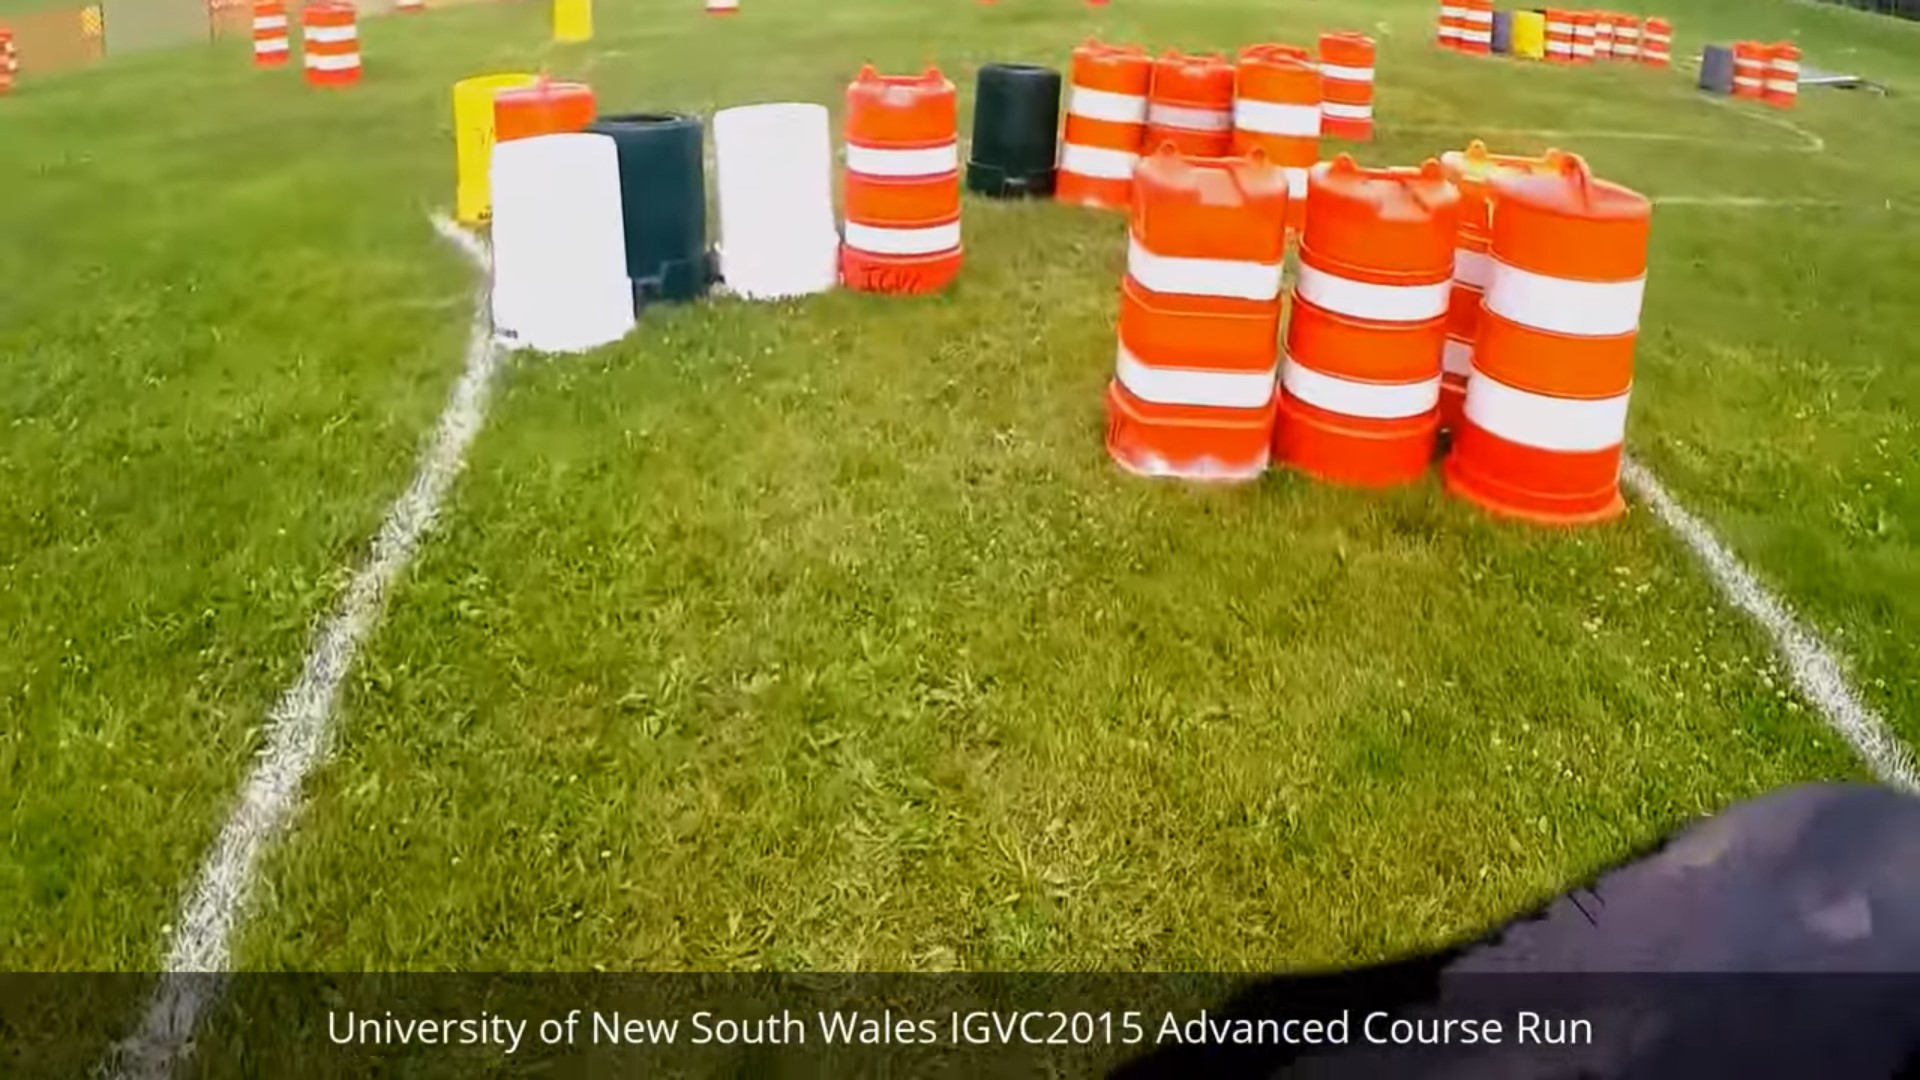

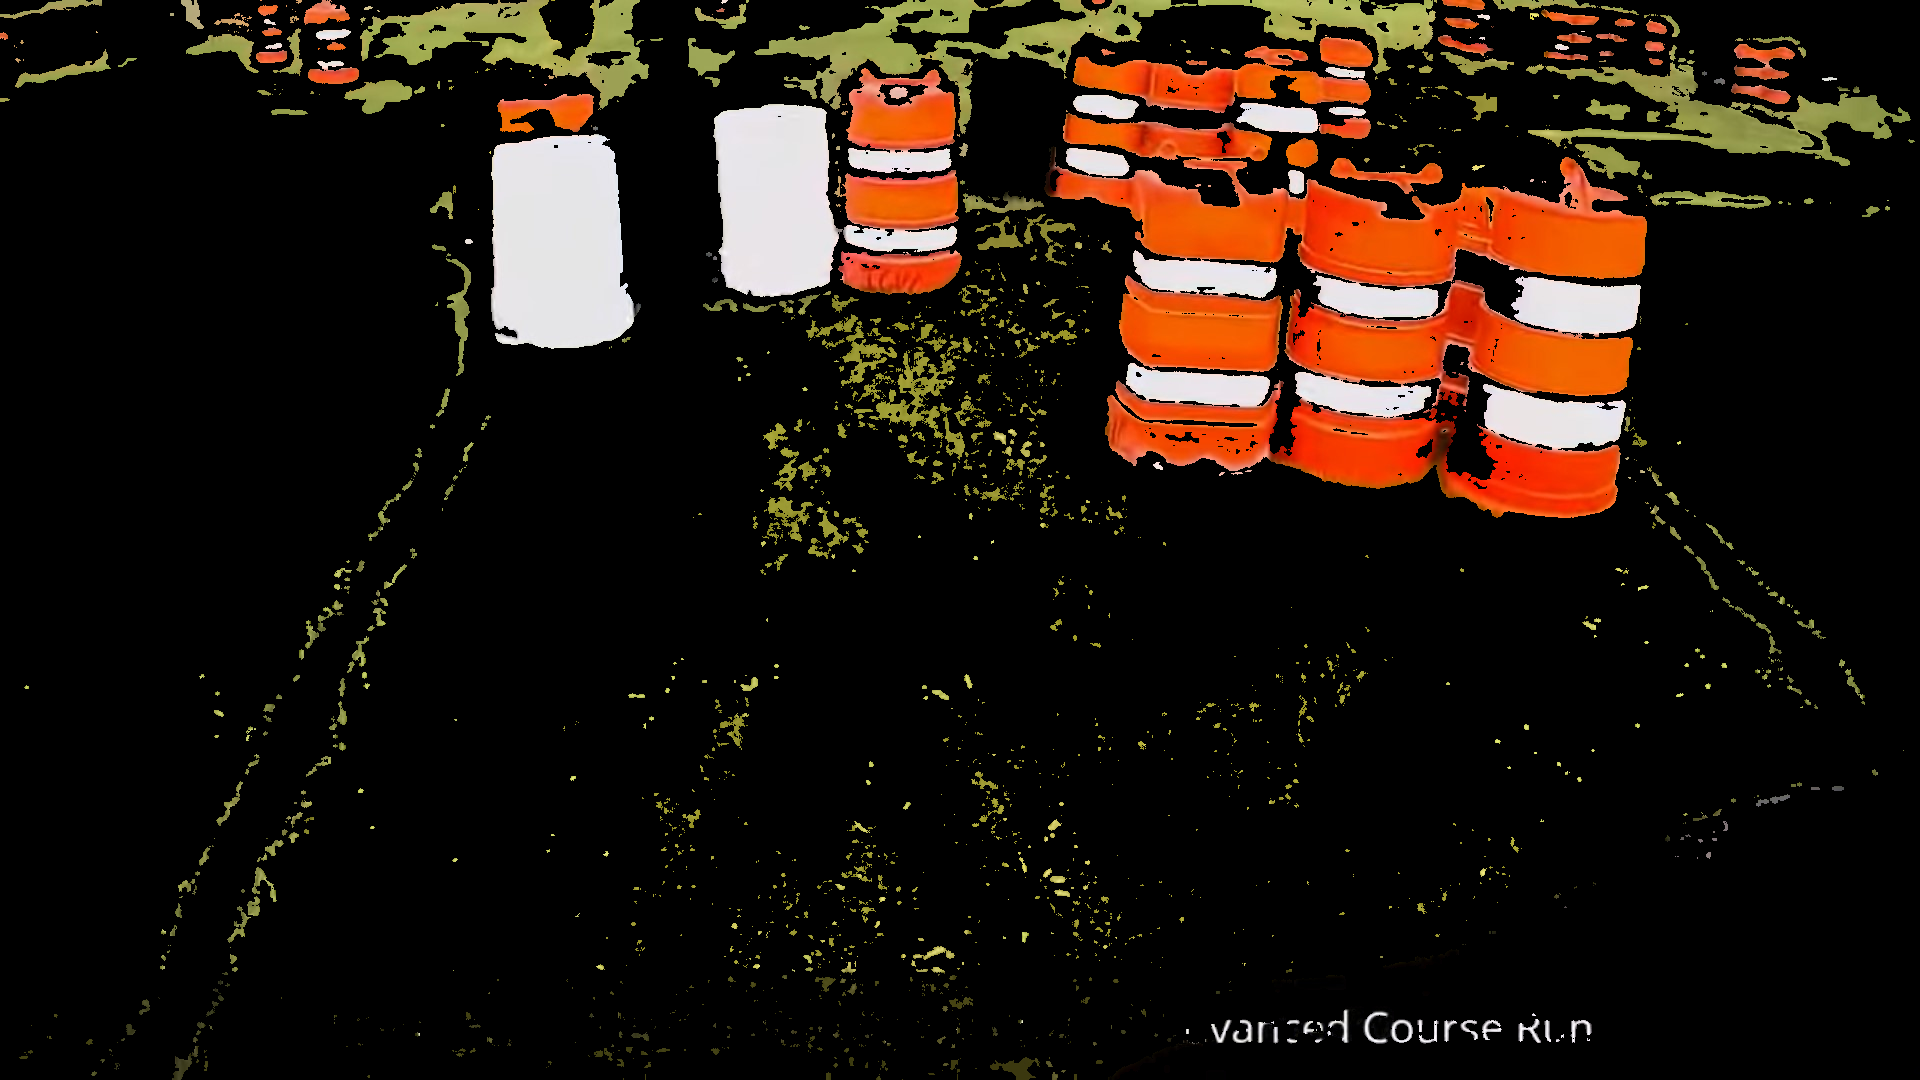

In [ ]:
obj = cv2.imread('/content/drive/MyDrive/image (2).jpg')
hsv = cv2.cvtColor(obj,cv2.COLOR_BGR2HSV)
cv2_imshow(obj)
target = cv2.imread('/content/drive/MyDrive/image.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
cv2_imshow(target)
# calculating object histogram
objhist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv2.normalize(objhist,objhist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],objhist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
cv2_imshow(res)
